# Home Assignment No. 3: Part 1 (Theory and Practice)
To solve this task, you will write a lot of code to try several machine learning methods for dimensionality reduction and anomaly detection.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

## Task 1. Practice with Different Anomaly Detection Algorithms. (5 points)
### Task 1.1. (1 point)
Explore two One-Class SVM methods, write down corresponding minimization functions (try to keep equal notations) and explain the differences (1-2 sentences).
1. Scholkopf et al.: http://papers.nips.cc/paper/1723-support-vector-method-for-novelty-detection.pdf
2. Tax et al.:  https://link.springer.com/content/pdf/10.1023/B:MACH.0000008084.60811.49.pdf

#### Your solution:

$\langle\langle\textbf{Your Latex Code}\rangle\rangle$

SVDD

$minR^2+C\sum_i\epsilon_i$ with $\|x_i - a\|^2 \leq R^2 + \epsilon_i$ $\forall i$

here $R>0$ is radius of hyperspere and $a$ its centre. $x_i$ training object, $\epsilon_i$ is a error we allow(if it equals zero all points are inside the sphere) and the parametr $C$ controls thre  trade off between the volume and the errors.


OneClassSVM

$min \frac{1}{2}\|w\|^2-\rho+\frac{1}{\nu N}\sum_i\epsilon_i$ with $(w, x_i) \geq \rho -\epsilon_i$  $\epsilon_i\geq0$ $\forall i$


$w$ is hyperplane which separates $x_i$ -data from the origin with margin  $\rho$. regularization parameter $\nu \in (0,1)$ s set manually to reflect the portion of data that should be separated. This parameter can be compared wtih the parameter C of the SVDD method


SVDD is not implemented in sklearn

If the data is hard to represent by simple plain it is better to use SVDD in this method one represents the data by enclosing the training examples using a hypersphere.


if the kernel function $k(x,x) =1 $ so we have identical decision functions for SVDD and OCSVM. Also SVDD  and OCSVM will be the same in case all samples lie on a hypersphere centered at the origin, and are are linearly separable from it.

### Task 1.2. (2 points)

1. **(1 pt.)** For the `frod_detection` dataset,  predict the anomaly with any three sklearn built-in Anomaly detection methods: https://scikit-learn.org/stable/modules/outlier_detection.html

**Note:** do not forget to relabel predictions from Anomaly detection methods, as they could be negative.

2. **(1 pt.)** Estimate the __contamination__ (or impurity) on the training set as the ratio of anomaly objects in the whole sample. Explore, how the `roc_auc_score` changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [3]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training

# print(pred)
train_y = 0

In [108]:
# impurity estimation on test data
contamination = test_y.mean()
print(contamination)


0.01693743518838576


In [110]:
# from sklearn.ensemble import # >>> your solution here <<<
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor



    
print('classifier ', 'Local outliers')
for i in [0.1, 1, 10]:
    clf = LocalOutlierFactor(n_neighbors=20, 
                       contamination= contamination * i,
                       metric='minkowski', 
                       p=2,
                       novelty=True)

    clf.fit(train_X)
    predEE= clf.predict(test_X)

    np.put(predEE, np.where(predEE==-1), [10 for i in range(len(predEE[predEE==-1]))])
    np.put(predEE, np.where(predEE==1), [0 for i in range(len(predEE[predEE==1]))])
    np.put(predEE, np.where(predEE==10), [1 for i in range(len(predEE[predEE==10]))])
    labels_isolation = predEE
# >>> your solution here <<<

    print('Contamination: ', np.round(contamination * i, 3), ' ', 
      'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
      'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))
    
    
print('classifier ', 'elliptic envelope')
for i in [0.1, 1, 10]:
    clf = EllipticEnvelope(assume_centered=True, contamination= contamination * i) 
    clf.fit(train_X)
    predEE= clf.predict(test_X)

    np.put(predEE, np.where(predEE==-1), [10 for i in range(len(predEE[predEE==-1]))])
    np.put(predEE, np.where(predEE==1), [0 for i in range(len(predEE[predEE==1]))])
    np.put(predEE, np.where(predEE==10), [1 for i in range(len(predEE[predEE==10]))])
    labels_isolation = predEE


    print('Contamination: ', np.round(contamination * i, 3), ' ', 
      'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
      'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))
    

print('classifier ', 'Isolation forest')
for i in [0.1, 1, 10]:
    clf = IsolationForest(n_estimators=100,
                         contamination= contamination * i,
                        max_features=1.0,
                        max_samples=1.0,
                        bootstrap=True,
                        random_state=0)
    clf.fit(train_X)
    predEE= clf.predict(test_X)

    np.put(predEE, np.where(predEE==-1), [10 for i in range(len(predEE[predEE==-1]))])
    np.put(predEE, np.where(predEE==1), [0 for i in range(len(predEE[predEE==1]))])
    np.put(predEE, np.where(predEE==10), [1 for i in range(len(predEE[predEE==10]))])
    labels_isolation = predEE

    print('Contamination: ', np.round(contamination * i, 3), ' ', 
      'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
      'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))

classifier  Local outliers
Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.981
Contamination:  0.017   ROC/AUC:  0.5 Precision:  0.963
Contamination:  0.169   ROC/AUC:  0.506 Precision:  0.817
classifier  elliptic envelope
Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.982
Contamination:  0.017   ROC/AUC:  0.533 Precision:  0.97
Contamination:  0.169   ROC/AUC:  0.735 Precision:  0.833
classifier  Isolation forest
Contamination:  0.002   ROC/AUC:  0.52 Precision:  0.983
Contamination:  0.017   ROC/AUC:  0.773 Precision:  0.987
Contamination:  0.169   ROC/AUC:  0.862 Precision:  0.847


So I think that the best performed method is Isolation forest because  ROC_auc score at all values of contamination is greater than 0.5 and precision does not change a lot while changing the values of contamination

### Task 1.3. (2 points)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance.

As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. **(1 pt.)** Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 
2. **(1 pt.)**  Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [171]:
# your favorite classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)
clf = RandomForestClassifier(max_depth=2, random_state=42)


roc_auc_score = []
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):

    # >>> your solution here <<<
    
print('ROC/AUC mean: ', np.mean(roc_auc_score), 'std: ', np.std(roc_auc_score))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.9808802299871566 std:  0.05039047077369414
Precision mean:  0.7636904761904761 std:  0.1940521837032503


In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=7)

skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)
clf = RandomForestClassifier(max_depth=2, random_state=42)
roc_auc_scor = []
pr_scor = []

for train_index, test_index in skf.split(test_X, test_y):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     sampler = RandomUnderSampler(random_state=0)
    X_train, X_test = np.array(test_X)[train_index], np.array(test_X)[test_index]
    y_train, y_test = np.array(test_y)[train_index], np.array(test_y)[test_index]
    
#     X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
    over_sampler = SMOTE(random_state=0)
    X_oversampled, y_oversampled = over_sampler.fit_sample(X_train, y_train)


    clf.fit(X_oversampled, y_oversampled)
    pred = clf.predict(X_test)
#     neigh.fit(X_train, y_train)
#     pred = neigh.predict(X_test)
    roc_auc_scor.append(roc_auc_score(y_test, pred))
    pr_scor.append(precision_score(y_test, pred))
    # >>> your solution here <<<
    
print('ROC/AUC mean: ', np.mean(roc_auc_scor), 'std: ', np.std(roc_auc_scor))    
print('Precision mean: ', np.mean(pr_scor), 'std: ', np.std(pr_scor))
# pr_scor

ROC/AUC mean:  0.9371855695576972 std:  0.1010264216477448
Precision mean:  0.7626190476190476 std:  0.13799585915112506


In [219]:

import statistics 

class AnnaVotes():
    def __init__(self, estimators):
#         self.X =X
        self.classifiers = estimators
        
        
    def fit(self, X,X_train, y):
        for i in range(len(self.classifiers)):
            try:
                self.classifiers[i] = self.classifiers[i].fit(X.extend(X_train))
            except:
                self.classifiers[i] = self.classifiers[i].fit(X,y)
            
            
    def predict(self, X, y):
        predicted = []
        answers = []
        for i in range(len(self.classifiers)):
            answers.append(self.classifiers[i].predict(X))
        answers = np.array(answers)
        
        
        for i in range(len(answers)) :
            arr= answers[i]
            if -1 in set(arr):
                np.put(arr, np.where(arr==-1), [10 for i in range(len(arr[arr==-1]))])
                np.put(arr, np.where(arr==1), [0 for i in range(len(arr[arr==1]))])
                np.put(arr, np.where(arr==10), [1 for i in range(len(arr[arr==10]))])
            answers[i] = arr
            
#             print(precision_score(y, answers[i]))
        
        for i in range(len(answers[0])):
#             predicted.append(np.median(answers.T[i]))
            predicted.append(np.mean(answers.T[i]))
      
        predicted = np.array(predicted)
        #print(predicted)
        np.put(predicted, np.where(predicted>=0.75), [1 for i in range(np.shape(predicted[predicted>=0.75])[0])])
        np.put(predicted, np.where(predicted<0.75), [0 for i in range(np.shape(predicted[predicted<0.75])[0])])
        
        return predicted



In [222]:
# ensemble of classifiers

from sklearn.metrics import roc_auc_score, precision_score


skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

roc_auc_scor = []
pr_scor = []

ifc = IsolationForest(n_estimators=100,
                         contamination= 'auto',
                        max_features=1.0,
                        max_samples=1.0,
                        bootstrap=True,
                        random_state=0)
clfEE = EllipticEnvelope(assume_centered=True,
                         ) 
clfLO = LocalOutlierFactor(n_neighbors=20,
                         contamination= 'auto',
                       metric='minkowski', 
                       p=2,
                       novelty=True)
clf = RandomForestClassifier(max_depth=2, random_state=42)

annaArrays = [ifc, clfEE, clfLO,clf]

Anna = AnnaVotes(annaArrays)

for train_index, test_index in skf.split(test_X, test_y):
    X_train, X_test = np.array(test_X)[train_index], np.array(test_X)[test_index]
    y_train, y_test = np.array(test_y)[train_index], np.array(test_y)[test_index]
    

    over_sampler = SMOTE(random_state=0)
    X_oversampled, y_oversampled = over_sampler.fit_sample(X_train, y_train)
    Anna.fit(X_oversampled, train_X, y_oversampled)
        
    pred = Anna.predict(X_test, y_test)
    roc_auc_scor.append(roc_auc_score(np.array(y_test), np.array(pred), average = 'micro'))
    pr_scor.append(precision_score(np.array(y_test), np.array(pred), average = 'micro'))

    # >>> your solution here <<<
    
print('ROC/AUC mean: ', np.mean(roc_auc_scor), 'std: ', np.std(roc_auc_scor))    
print('Precision mean: ', np.mean(pr_scor), 'std: ', np.std(pr_scor))

ROC/AUC mean:  0.5630664689893747 std:  0.07835416242449211
Precision mean:  0.9813363560434316 std:  0.005612862789679123


Precision shows how accurate the positive predictions are. Here we have imballanced classes so the higher precision is the better. With ensemble of class we achive better precision. So it means that we predict more true labels when it is actually true labels. ROC AUC score is not that representative cause its better for ballanced classes

## Task 2. Practice with Different Clustering Algorithms. (4 points)
### Task 2.1. Explore KMeans and Gaussian Mixture algorithms. (2 points)
Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. **(1 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. **(1 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

True number of clusters is 15


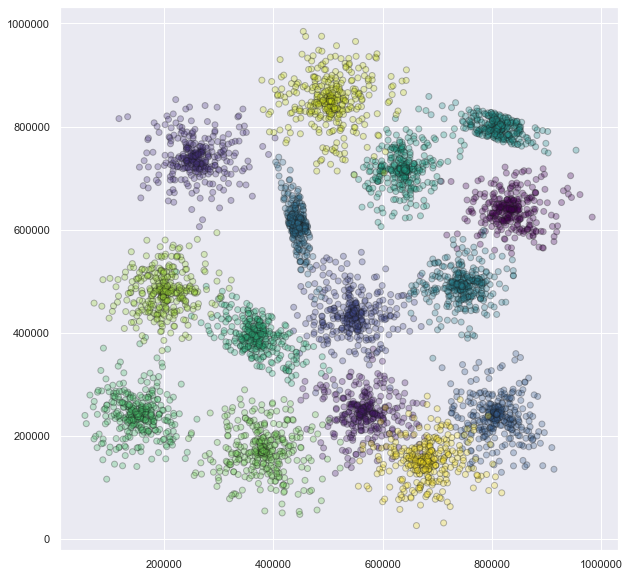

In [71]:
import numpy as np
import matplotlib.pyplot as plt

points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], cmap = 'viridis', c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [72]:
### BEGIN Solution
from sklearn.cluster import KMeans, Birch, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler


# >>> your solution here <<<

true_num_clusters = int(np.max(labels))
names = ['KMeans', 'Gaussian Mixture', 'Birch', 'Agglomerative Clustering']
clstr = [KMeans(random_state=0, n_clusters=true_num_clusters), 
         GaussianMixture(random_state=8, n_components=true_num_clusters), 
         Birch(branching_factor=2, threshold=10, n_clusters=true_num_clusters), 
         AgglomerativeClustering(linkage='average', n_clusters=true_num_clusters)]
attr_name = ['n_clusters', 'n_components', 'n_clusters', 'n_clusters']

print('Silhouette score for true labels:', silhouette_score(points, labels))
print('\n\n')

for alg_idx in range(len(clstr)):
    
    cl = clstr[alg_idx]
    cl.fit(points)

    if hasattr(cl, 'labels_'):
        y_pred = cl.labels_.astype(np.int)
    else:
        y_pred = cl.predict(points)
    
    print('silhoute  ', silhouette_score(points, y_pred))
    print('mi  ', mutual_info_score(labels, y_pred))
    print('\n\n')

### END Solution

Silhouette score for true labels: 0.6088944608894215



silhoute   0.6260718828357552
mi   2.560612815598387



silhoute   0.5755068045046733
mi   2.4770726291301473



silhoute   0.6075939207380119
mi   2.5077832875665407



silhoute   0.6091772373449134
mi   2.519454846864759





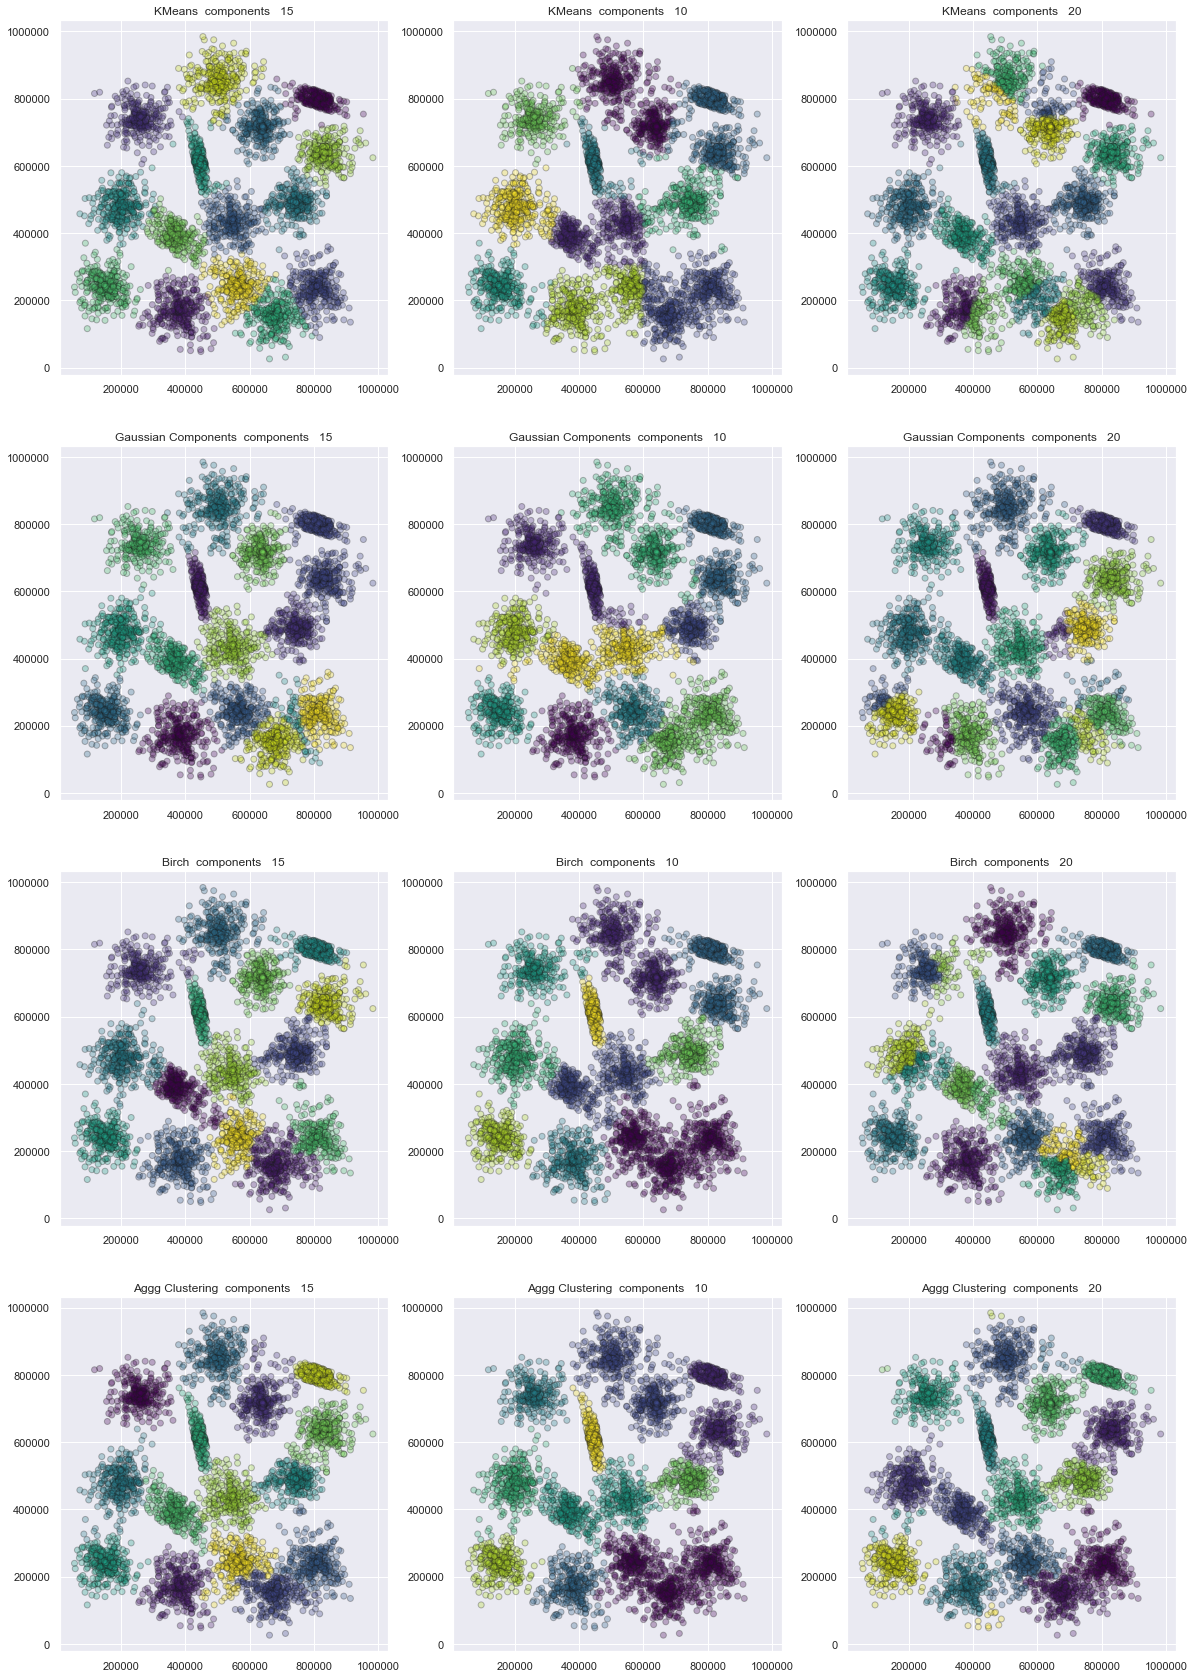

In [74]:
from sklearn.cluster import KMeans, MiniBatchKMeans 
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

names = ['KMeans', 'Gaussian Components', 'Birch', 'Aggg Clustering']
clstr = clstr = [KMeans(random_state=0), 
         GaussianMixture(random_state=8), 
         Birch(branching_factor=2, threshold=10), 
         AgglomerativeClustering(linkage='average')]
attr_name = ['n_clusters', 'n_components', 'n_clusters', 'n_clusters']
n_comp_settings = np.arange(10,21, dtype=int)
n_comp_to_plot = [15, 10, 20]
n_methods = len(names)
n_settings = len(n_comp_settings)

s_scores = np.zeros((n_methods, n_settings))
MI_scores = np.zeros((n_methods, n_settings))


fig, ax = plt.subplots(4,3, figsize=(20,30))

for alg_idx in range(n_methods):
    for comp_idx, n_c in enumerate(n_comp_settings):
        
        cl = clstr[alg_idx]
        setattr(cl, attr_name[alg_idx], int(n_c))
        cl.fit(points)

        if hasattr(cl, 'labels_'):
            y_pred = cl.labels_.astype(np.int)
        else:
            y_pred = cl.predict(points)
        
        s_scores[alg_idx, comp_idx] = silhouette_score(points, y_pred)
        MI_scores[alg_idx, comp_idx] = mutual_info_score(labels, y_pred)
        
        if n_c in n_comp_to_plot:
            col_idx = np.argwhere(n_c == n_comp_to_plot)[0][0]
            #print(col_idx)
            ax[alg_idx, col_idx].set_title(names[alg_idx] +'  ' +'components   '+ str(n_c))
            ax[alg_idx, col_idx].scatter(points[:,0], points[:,1], c=y_pred, cmap='viridis', alpha=0.3, edgecolor='k')


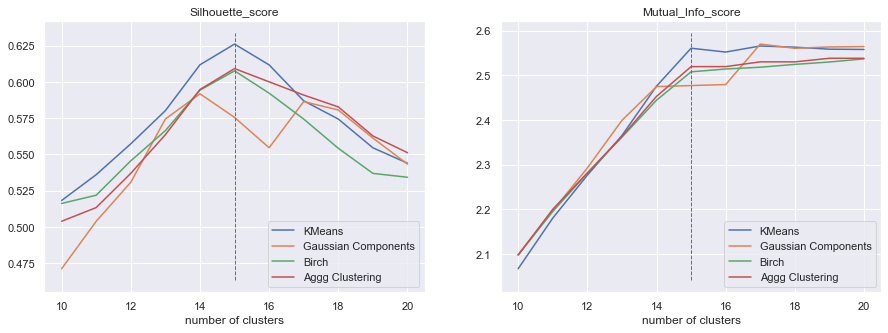

In [75]:
# vizualize the clustering result, calculate the clustering metrics and plot them;
### BEGIN Solution

# >>> your solution here <<<
scores = np.zeros((2, n_methods, n_settings))
scores[0,:,:] = s_scores
scores[1,:,:] = MI_scores
titles = ['Silhouette_score', 'Mutual_Info_score']
fig, axes = plt.subplots(ncols=2, nrows=1, **{'figsize': (15,5)})
for score_idx in range(2):
    ax = axes[score_idx]
    for alg_idx in range(n_methods):
        ax.plot(n_comp_settings, scores[score_idx, alg_idx, :], label = names[alg_idx])
    ylim = ax.get_ylim()    
    ax.plot([true_num_clusters,true_num_clusters], [ylim[0], ylim[1]], 'b--', linewidth=1)
    ax.legend()
    ax.set_title(titles[score_idx])
    ax.set_xlabel("number of clusters")

### END Solution

### Task 2.2. Finding the Number of Clusters with Bootstrap. (2 points)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence interval (CI)**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__  
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

Number of clusters:  10
Variance: 6.086399709847177e-05
Confidence interval: (0.49480661464657283, 0.5253880821402446)
Number of clusters:  11
Variance: 9.838579257173287e-05
Confidence interval: (0.5061476131952349, 0.5450292268811747)
Number of clusters:  12
Variance: 5.701107992962979e-05
Confidence interval: (0.529813759698045, 0.5594114431123243)
Number of clusters:  13
Variance: 5.9189314821327616e-05
Confidence interval: (0.5559245504030198, 0.5860823563916012)
Number of clusters:  14
Variance: 0.00012277762139607142
Confidence interval: (0.5741815046005173, 0.6176162914283944)
Number of clusters:  15
Variance: 0.00014766969749985555
Confidence interval: (0.5788846543877925, 0.6265193922168203)
Number of clusters:  16
Variance: 0.00010378669235140147
Confidence interval: (0.5756680584523771, 0.6156026201654575)
Number of clusters:  17
Variance: 8.13228898043721e-05
Confidence interval: (0.5723182199133044, 0.6076678186303107)
Number of clusters:  18
Variance: 0.00010875973703013

Text(0.5, 1.0, "Mean sillhouette score for the Agglomerative Clustering method and it's 95% confidence interval")

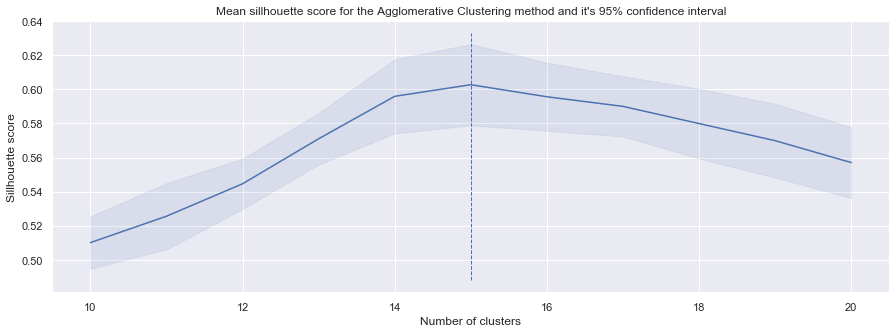

In [76]:
import scipy

from tqdm import tqdm_notebook, tqdm

### BEGIN Solution

cluster_ns = np.arange(10,21)# >>> your solution here <<<
num_settings = np.size(cluster_ns)
sample_number = 100 #>>> your solution here <<<
n_points_subsample = np.int(0.75*np.shape(points)[0]) # 75% of original size
cl = AgglomerativeClustering(linkage='average')
#plot_data = np.zeros((cluster_ns.shape[0], 3))
CI = np.zeros((num_settings, 2))
mean_score = np.zeros((num_settings, 1))

for i, n_c in enumerate(cluster_ns):
    # >>> your solution here <<<
    print('Number of clusters: ', n_c)
    setattr(cl, 'n_clusters', int(n_c))
    
    
    sub_scores = np.zeros((sample_number))
    for idx in range(sample_number):
        sub_idx = np.random.choice(np.shape(points)[0], n_points_subsample)
        cl.fit(points[sub_idx])
        y_pred = cl.labels_.astype(np.int)
        sub_scores[idx] = silhouette_score(points[sub_idx], y_pred)

    CI[i,:] = scipy.stats.norm.interval(0.95, loc=np.mean(sub_scores), scale=np.std(sub_scores))
    mean_score[i,0] = np.mean(sub_scores)
    
    print('Variance:', np.var(sub_scores))
    print('Confidence interval:', (CI[i,0], CI[i,1]))
        
plt.figure(figsize=(15,5))
plt.plot(cluster_ns, mean_score)
plt.fill_between(cluster_ns, CI[:,0], CI[:,1], color='b', alpha=0.1)
n_c_opt = cluster_ns[np.argmax(mean_score)]
ylim = plt.ylim()  
plt.plot([n_c_opt,n_c_opt], [ylim[0], ylim[1]], 'b--', linewidth=1)
plt.xlabel('Number of clusters')
plt.ylabel('Sillhouette score')
plt.title('Mean sillhouette score for the Agglomerative Clustering method and it\'s 95% confidence interval')
### END Solution

## Task 3. MNIST, kMNIST component analysis and manifold learning. (6 points)
### Task 3.1. (2 points)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimentionality, decompose the dataset on pinciple components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case use can use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. **(1 pt.)** Estimate the intrinsic dimentionality of the dataset. Provide the plot.
2. **(1 pt.)** Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set()

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)

In [10]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstanec betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

In [18]:
# import warnings
# warnings.filterwarnings("ignore")

k1 = 2 # start of interval(included)
k2 = 60 # end of interval(included)
nb_iter = 10 # more iterations more accuracy

intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=nb_iter, # nb_iter for bootstrapping
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)



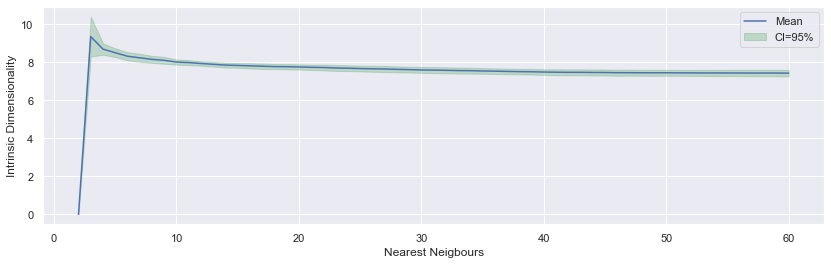

In [19]:
x = np.arange(k1, k2+1)

plt.figure(figsize=(14, 4))
 # it is the mean walue
mean =  np.mean(intdim_k_repeated, axis=0)
stdd = np.std(intdim_k_repeated, axis=0)
plt.plot(x, mean, 'b', label='Mean')
plt.fill_between(x, mean - stdd, mean + stdd, alpha=0.3, label='CI=95%', color='g')
plt.xlabel("Nearest Neigbours")
plt.ylabel("Intrinsic Dimensionality")
plt.legend()
plt.show()

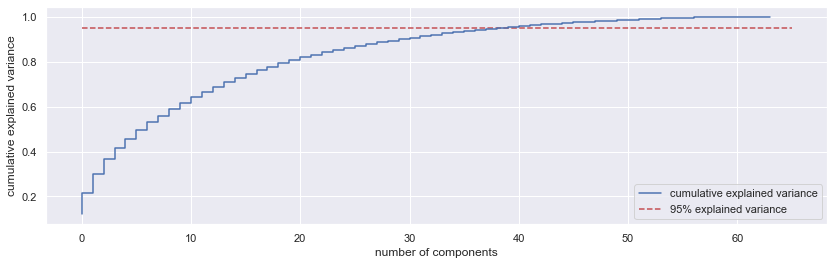

In [34]:
from sklearn.decomposition import PCA

# plt.hlines(y=0.95, xmin=0, xmax= len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance')

plt.figure(figsize=(14, 4))
pca = PCA().fit(data)
plt.step(range(len(pca.components_)),np.cumsum(pca.explained_variance_ratio_), label= 'cumulative explained variance')
plt.hlines(0.95, 0, 65, colors='r', linestyles='dashed', label = '95% explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend(loc='lower right')
plt.show()
# pca = PCA(n_components=3) 


# pca.fit(X)
# X = pca.transform(X)
# plot_3d(X, np.zeros_like(y), 'PCA() IRIS no labels')

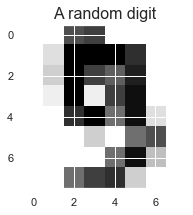

In [77]:
# Plot the example of back-decomposition with 6 different 
# set of components and corresponding explained variance. You can choose any digit from the dataset.
import numpy as np
import matplotlib.pyplot as plt
plt.figure(5, figsize=(3, 3))
plt.imshow(dg.images[9], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('A random digit', fontsize=16)
plt.show()

y = dg.target
X = dg.images.reshape(-1, 8*8) / dg.images.max()

In [25]:
len(y)

1797

In [85]:
pca = PCA()
lower_dimensional_data = pca.fit_transform(dg.data)

In [86]:

pca.n_components_

41

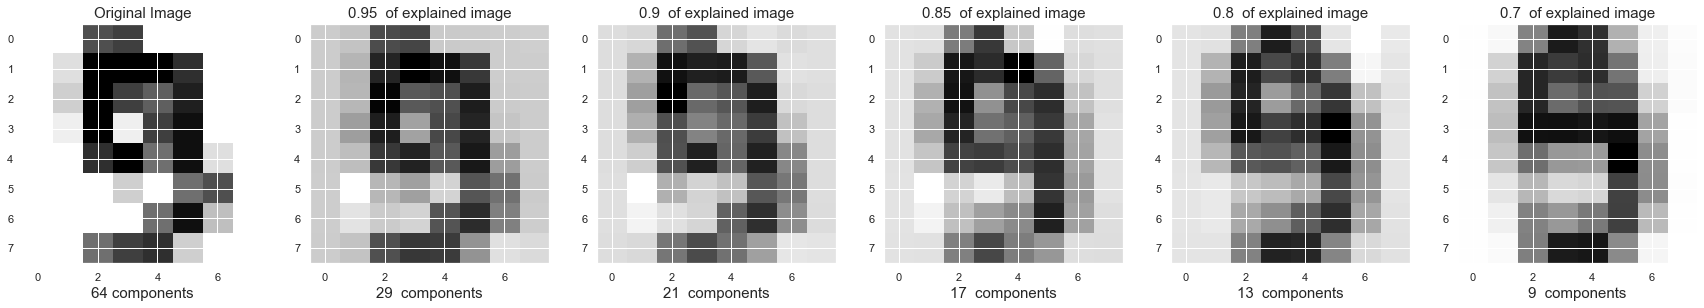

In [96]:

fig, ax = plt.subplots(1,6, figsize=(30,10))
ax[0].imshow(dg.data[9].reshape(8,8),  cmap=plt.cm.gray_r, interpolation='nearest')
ax[0].set_xlabel('64 components', fontsize = 15)
ax[0].set_title('Original Image', fontsize = 15)

n = 1

for i in [0.95, 0.9, 0.85, 0.8, 0.7]:
    pca = PCA(i) 
    lower_dimensional_data = pca.fit_transform(dg.data)
    approximation = pca.inverse_transform(lower_dimensional_data)
    ax[n].imshow(approximation[9].reshape(8,8),  cmap=plt.cm.gray_r, interpolation='nearest')
    ax[n].set_xlabel(str(pca.n_components_)+'  components', fontsize = 15)
    ax[n].set_title(str(i)+'  of explained image', fontsize = 15)
    n+=1
    

### Task 3.2. (2 points)

Here we will visualise the decomposition in order to observe how data diverges across different manofild learning methods. We are  to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Make sure the data is whitened (scaled), enjoy nice plots :) 
2. **(1 pt.)** Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimention**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
3. **(1 pt.)** Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 senteces.

__NOTE:__ In first task, `plotly` will not display the plot in offline notebook, so it is just for you to visualize the projection in 3D.

In [88]:
import plotly
import plotly.offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import colorlover as cl

init_notebook_mode(connected=True)

In [89]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap
### BEGIN Solution

# >>> your solution here <<<

pca = PCA(n_components=3, random_state=42)
S_pca_ = pca.fit_transform(dg.data)
ica = FastICA(n_components=3, random_state=42)
S_ica_ = ica.fit_transform(dg.data)
isomap = Isomap(n_components=3)
S_isomap = isomap.fit_transform(dg.data)
### END Solution

In [97]:
import pandas as pd

digits_3d = pd.DataFrame({
    'x': S_pca_[:, 0], 
    'y': S_pca_[:, 1], 
    'z': S_pca_[:, 2],
    'label': dg['target'],
})

colors = cl.scales['10']['qual']['Paired']
data = []

for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    
    color = colors[i]
    
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization PCA',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

import os

# if not os.path.exists("images"):
#     os.mkdir("images")
    
fig.write_image("anya.png")

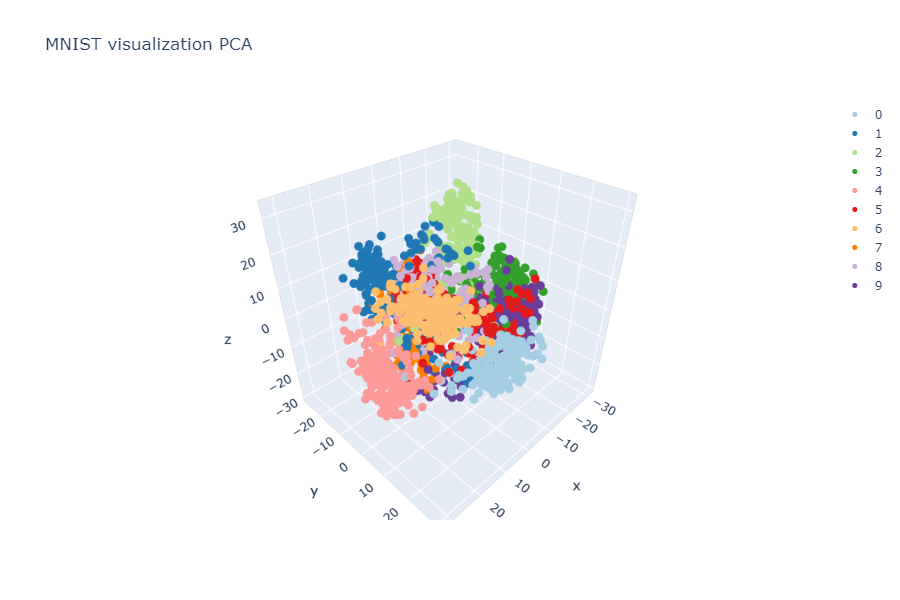

In [98]:
from IPython.display import Image
Image("anya.png")

In [42]:
# Calculate new features on the data with ICA, PCA and Isomap and the classification accuracy on these features 

from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')


logreg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)
score_pca = []
score_ica = []
score_isomap = []
### BEGIN Solution
pca = PCA(n_components=10, random_state=42)
# S_pca_ = pca.fit_transform(dg.data)
ica = FastICA(n_components=10, random_state=42)
# S_ica_ = ica.fit_transform(dg.data)
isomap = Isomap(n_components=10)

for train_index, test_index in rkf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_sc = sc.fit_transform(X)
    X_train, X_test = X_sc[train_index], X_sc[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    logreg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
    logreg.fit(X_train_pca, y_train)
    y_pred = logreg.predict(X_test_pca)
    score_pca.append(accuracy_score(y_test, y_pred))
    
    
    
    
    #     sc = StandardScaler()
#     X_train_std = sc.fit_transform(X_train)
#     X_test_std = sc.transform(X_test)
    
for train_index, test_index in rkf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)
    X_train_ica = ica.fit_transform(X_train_std)
    X_test_ica = ica.transform(X_test_std)
    
    logreg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
    logreg.fit(X_train_ica, y_train)
    y_pred = logreg.predict(X_test_ica)
    score_ica.append(accuracy_score(y_test, y_pred))
    
    
for train_index, test_index in rkf.split(X):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)
    X_train_isomap = isomap.fit_transform(X_train_std)
    X_test_isomap = isomap.transform(X_test_std)
    
    
    logreg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
    logreg.fit(X_train_isomap, y_train)
    y_pred = logreg.predict(X_test_isomap)
    score_isomap.append(accuracy_score(y_test, y_pred))
    
# >>> your solution here <<<
print(np.mean(score_pca), np.mean(score_ica), np.mean(score_isomap))

print(np.std(score_pca), np.std(score_ica), np.std(score_isomap))
scores = list()

0.8801769318064582 0.7583049623439595 0.9538099659548129
0.8801769318064582 0.7583049623439595 0.9538099659548129


In [39]:
print(np.std(score_pca), np.std(score_ica), np.std(score_isomap))

0.01706871032603466 0.031043052065631193 0.008617769458593983


In [155]:
d = {'methods': ['PCA', 'ICA', 'ISOMAP'], 'mean': [np.mean(score_pca), np.mean(score_ica), np.mean(score_isomap)], 'std': [np.std(score_pca), np.std(score_ica), np.std(score_isomap)]}
df = pd.DataFrame(data=d)
df

,methods,mean,std
0,PCA,0.880177,0.017069
1,ICA,0.758305,0.031043
2,ISOMAP,0.953810,0.008618


In [154]:
# >>> your solution here <<<
from scipy import stats
pval = stats.ttest_ind(score_pca,  score_ica, equal_var=True)[1]
print('Statistically significant improvement of PCA decomposition over ICA: p-value  ', pval)

Statistically significant improvement of PCA decomposition over ICA: p-value   2.797615531257653e-13


In [153]:
pval = stats.ttest_ind(score_isomap,  score_pca, equal_var=True)[1]

print('Statistically significant improvement of Isomap decomposition over PCA: p-value  ', pval)

Statistically significant improvement of Isomap decomposition over PCA: p-value   1.77578406364717e-14


Here we deal with multidimensional data so we cannot approximate this with  pca. Isomap works well because data is  strustured and can be grouped well. So I think that we get good neighbourhood graph and thus Isomap performs well. But it takes a lot of time for isomap to compute so it is a flow

### Task 3.3. kMNIST dimensionality reduction. (2 points)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engeneer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than `93%`. Is it fair to `fit` with manifold Learning method for both train and test samples? 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`, you will find it in __Part 2__.  Save 3 first components of your projection on `train` sample to `.csv`, we are going to visually compare them later.


In [161]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import PCA

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)


# rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)

neigh = KNeighborsClassifier(n_neighbors=7)


### BEGIN Solution

# >>> your solution here <<<

In [ ]:
print(len(x))

In [104]:
neigh = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)


pca = PCA(n_components= 55, random_state=42)
X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)
neigh.fit(X_train_pca, y_train)
y_pred = neigh.predict(X_test_pca)

print(accuracy_score(y_test, y_pred))

0.9338


In [117]:
anya = np.array(x_train@pca.components_[:3].T)
anya_beauty = np.append(anya, y_train.reshape(-1,1), axis=1)

In [121]:
anya_beauty_df= pd.DataFrame(anya_beauty)


In [124]:
anya_beauty_df.to_csv('anya_queen.csv', index=False)

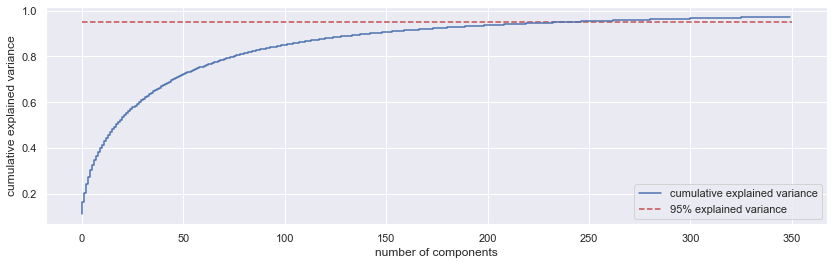

In [159]:
plt.figure(figsize=(14, 4))
pca = PCA(350, random_state=42).fit(x_train)
plt.step(range(len(pca.components_)),np.cumsum(pca.explained_variance_ratio_), label= 'cumulative explained variance')
plt.hlines(0.95, 0, 350, colors='r', linestyles='dashed', label = '95% explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend(loc='lower right')
plt.show()

As we could see from the picture I occasionally deleted the optimum number of components for KNN was about 55 so I used that number in my model.

#### Voilla! you are done, have a good day ;)